In [3]:
import numpy as np
test=np.asarray([68, 82, 115,150,157,189,200,218,232])
test.shape

(9,)

In [5]:
spike=[0.231927459, 1.649442638, 4.980908923, 1.490147774, 0.548712094, 0.234322333, 0.165871831, 0.039443932]
len(spike)

8

In [7]:
Lena_regressor=np.zeros((4,300))
spike=[0.231927459, 1.649442638, 4.980908923, 1.490147774, 0.548712094, 0.234322333, 0.165871831, 0.039443932]
for i in [68, 82, 115,150,157,189,200,218,232]:
    Lena_regressor[0,i:i+len(spike)]=spike
for i in [75, 89, 108,164,171,182,207,225,239]:
    Lena_regressor[1,i:i+len(spike)]=spike
for i in [64, 100, 122,157,174,178,189,196,210,214,228,232]:
    Lena_regressor[2,i:i+len(spike)]=spike
for i in [68, 82, 115,150,157,189,200,218,232]:
    Lena_regressor[3,i:i+len(spike)]=spike    

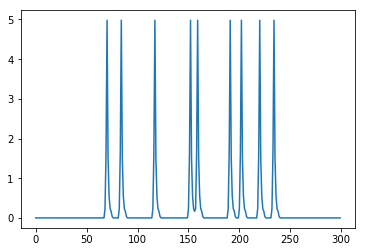

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Lena_regressor[0,:])

In [ ]:
from registration import CrossCorr
algorithm = CrossCorr()

In [ ]:
reference = data.mean()
reference.shape

In [ ]:
reference=reference.first()
reference.shape

In [ ]:
model = algorithm.fit(data,reference)

In [ ]:
Corrected=model.transform(data)
Corrected

In [1]:
import thunder as td
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
%matplotlib inline

In [ ]:
from regression import LinearRegression

In [2]:
import findspark
findspark.init()

In [3]:
from pyspark import SparkConf, SparkContext
# conf = (SparkConf()
#          .setMaster("local")
#          .setAppName("My app")
#          .set("spark.executor.memory", "40g")
#          .set("spark.ui.port","8080")
#          .set("spark.driver.host","127.0.0.1")
#          .set("spark.local.dir","/mnt/tmp/")
#        )

# sc = SparkContext(conf = conf)
sc = SparkContext()

In [5]:
sc._conf.getAll()

[(u'spark.driver.host', u'127.0.0.1'),
 (u'spark.executor.id', u'driver'),
 (u'spark.app.id', u'local-1504740282540'),
 (u'spark.driver.cores', u'12'),
 (u'spark.app.name', u'pyspark-shell'),
 (u'spark.driver.memory', u'60g'),
 (u'spark.driver.port', u'33057'),
 (u'spark.local.dir', u'/mnt/temp'),
 (u'spark.rdd.compress', u'True'),
 (u'spark.executor.memory', u'60g'),
 (u'spark.executor.cores', u'12'),
 (u'spark.serializer.objectStreamReset', u'100'),
 (u'spark.driver.maxResultSize', u'0'),
 (u'spark.master', u'local[*]'),
 (u'spark.submit.deployMode', u'client')]

In [ ]:
a=[1,4,3,5]
a = sc.parallelize(a)
print a
print a.take(2)

In [ ]:
sc.stop()

In [20]:
data = td.images.fromtif('/mnt/downloads/Michael2/DSLS_dz1Rep4.tif', nplanes=1,engine=sc, npartitions=2000)
data2 = td.images.fromtif('/mnt/downloads/Michael2/DSLS_sz1Rep4.tif', nplanes=1,engine=sc, npartitions=2000)

In [6]:
import caiman as cm
fname_new = cm.save_memmap(['/mnt/downloads/Michael2/f2z1_D3rep.tif'])
Yr, dims, T = cm.load_memmap(fname_new)
Y = np.reshape(Yr, dims + (T,), order='F')
Cn = cm.local_correlations(Y)
np.save('/mnt/downloads/Michael2/correlation_f2z1_D3rep.npy',Cn)

/mnt/downloads/Michael2/f2z1_D3rep.tif


In [7]:
import caiman as cm
fname_new = cm.save_memmap(['/mnt/downloads/Michael2/f2z1_S3rep.tif'])
Yr, dims, T = cm.load_memmap(fname_new)
Y = np.reshape(Yr, dims + (T,), order='F')
Cn = cm.local_correlations(Y)
np.save('/mnt/downloads/Michael2/correlation_f2z1_S3rep.npy',Cn)

/mnt/downloads/Michael2/f2z1_S3rep.tif


In [21]:
data = data.repartition(5000)
data2 = data2.repartition(5000)
data.npartitions()

5000

In [22]:
filtered = data.toseries().detrend('linear').normalize()
filtered.npartitions()

26

In [23]:
filtered2 = data2.toseries().detrend('linear').normalize()
filtered2.npartitions()

26

In [ ]:
regressor=scipy.io.loadmat('/mnt/downloads/Itia/opt_trap.mat')
regressor=regressor['Opt_trap']

In [24]:
regressor=scipy.io.loadmat('/mnt/downloads/Michael/Tone_Regressors.mat')
regressor=regressor['Tone']

In [12]:
algorithm = LinearRegression()

In [25]:
regressor=regressor[0][0:400]
regressor=regressor.reshape(-1,1)
regressor.shape

(400, 1)

In [26]:
model = algorithm.fit(regressor,filtered)
model2 = algorithm.fit(regressor,filtered2)

In [ ]:
regressor.shape

In [27]:
r2 = model.score(regressor,filtered)
r2b = model2.score(regressor,filtered2)

In [30]:
np.save('/mnt/downloads/Michael2/results_DSLS_dz1Rep4_linregb.npy',r2)
np.save('/mnt/downloads/Michael2/results_DSLS_sz1Rep4_linregb.npy',r2b)

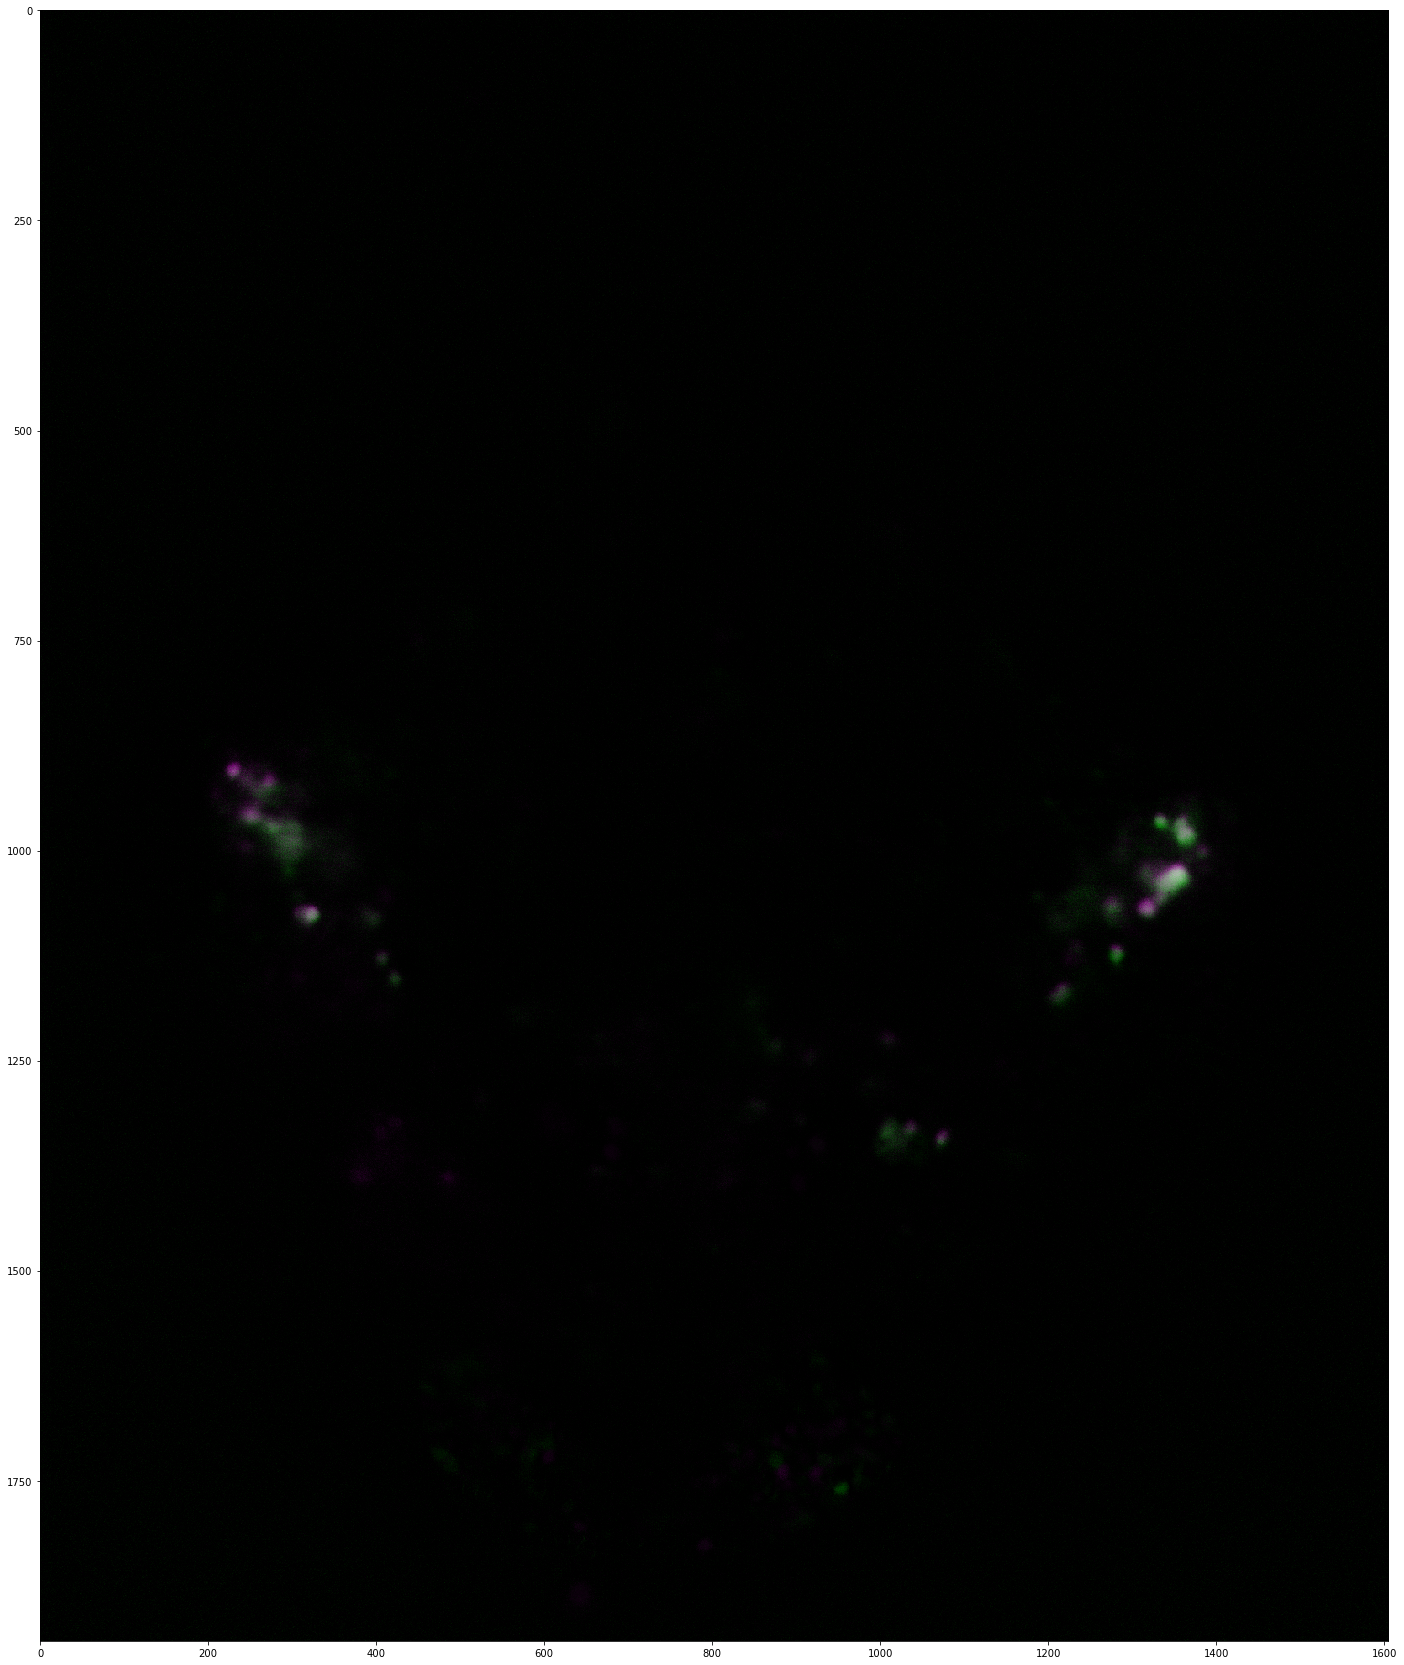

In [29]:
r2_d=r2.toarray()
r2_s=r2b.toarray()
plt.figure(figsize = (30,30))
temp=np.zeros((3,int(r2_s.shape[0]),int(r2_s.shape[1])))
temp[0,:,:]=r2_d
temp[1,:,:]=r2_s
temp[2,:,:]=r2_d
#temp[temp==1]=0
temp=temp.swapaxes(0,2)
temp=temp.swapaxes(0,1)
plt.imshow(temp)
plt.savefig('/mnt/downloads/Michael2/DSLS_dz1Rep4_Thunder_LinRegb.png',transparent=True, dpi=300)

In [19]:
r2_d

Series
mode: spark
dtype: float64
shape: (1920, 1107, 1)

In [18]:
r2_d=r2#.toarray()
r2_s=r2b#.toarray()
plt.figure(figsize = (30,30))
temp=np.zeros((3,int(r2_s.shape[0]),int(r2_s.shape[1])))
temp[0,:,:]=r2_d
temp[1,:,:]=r2_s
temp[2,:,:]=r2_d
#temp[temp==1]=0
temp=temp.swapaxes(0,2)
temp=temp.swapaxes(0,1)
plt.imshow(temp)
#plt.savefig('/mnt/downloads/Michael2/f2z1_D3rep_Thunder_LinRegb.png',transparent=True, dpi=300)

TypeError: __array__() takes exactly 1 argument (2 given)

In [ ]:
data = td.images.fromtif('/mnt/downloads/Michael2/dSPIMfish1z1_rep5.tif', nplanes=1,engine=sc, npartitions=2000)
data2 = td.images.fromtif('/mnt/downloads/Michael2/SPIMfish1z1_rep5.tif', nplanes=1,engine=sc, npartitions=2000)
filtered = data.toseries().detrend('linear').normalize()
filtered2 = data2.toseries().detrend('linear').normalize()
model = algorithm.fit(regressor,filtered)
model2 = algorithm.fit(regressor,filtered2)
r2 = model.score(regressor,filtered)
r2b = model2.score(regressor,filtered2)
np.save('/mnt/downloads/Michael2/results_dSPIMfish1z1_linregb.npy',r2)
np.save('/mnt/downloads/Michael2/results_SPIMfish1z1_linregb.npy',r2b)
r2_d=r2.toarray()
r2_s=r2b.toarray()
plt.figure(figsize = (30,30))
temp=np.zeros((3,int(r2_s.shape[0]),int(r2_s.shape[1])))
temp[0,:,:]=r2_d
temp[1,:,:]=r2_s
temp[2,:,:]=r2_d
#temp[temp==1]=0
temp=temp.swapaxes(0,2)
temp=temp.swapaxes(0,1)
plt.imshow(temp)
plt.savefig('/mnt/downloads/Michael2/dSPIMfish1z2_MCd_Thunder_LinRegb.png',transparent=True, dpi=300)

In [ ]:
data = td.images.fromtif('/mnt/downloads/Michael2/dSPIMfish1z2_rep5.tif', nplanes=1,engine=sc, npartitions=2000)
data2 = td.images.fromtif('/mnt/downloads/Michael2/SPIMfish1z2_rep5.tif', nplanes=1,engine=sc, npartitions=2000)
filtered = data.toseries().detrend('linear').normalize()
filtered2 = data2.toseries().detrend('linear').normalize()
model = algorithm.fit(regressor,filtered)
model2 = algorithm.fit(regressor,filtered2)
r2 = model.score(regressor,filtered)
r2b = model2.score(regressor,filtered2)
np.save('/mnt/downloads/Michael2/results_dSPIMfish1z2_linregb.npy',r2)
np.save('/mnt/downloads/Michael2/results_SPIMfish1z2_linregb.npy',r2b)
r2_d=r2.toarray()
r2_s=r2b.toarray()
plt.figure(figsize = (30,30))
temp=np.zeros((3,int(r2_s.shape[0]),int(r2_s.shape[1])))
temp[0,:,:]=r2_d
temp[1,:,:]=r2_s
temp[2,:,:]=r2_d
#temp[temp==1]=0
temp=temp.swapaxes(0,2)
temp=temp.swapaxes(0,1)
plt.imshow(temp)
plt.savefig('/mnt/downloads/Michael2/dSPIMfish1z1_MCd_Thunder_LinRegb.png',transparent=True, dpi=300)

In [ ]:
sc